# Dataset Overview

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def plot_feature_samples_per_subject(df, column, save_fig=False):
    # Group by 'id' and count non-null 'CGM' values
    counts = df.groupby('id')[f'{column}'].count()
    print(f'{column} counts', counts)
    print(counts.max())
    print(counts.min())
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(f'Number of {column} Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} samples per ID')
    
    plt.show()
    
    if save_fig:
        plt.savefig(f'{column}_feature_samples_per_subject.png')

In [24]:
def plot_daily_average_feature_sum_per_subject(df, column, save_fig=False):
    # Define a function to resample and calculate daily sum within each group
    def resample_and_sum(group):
        return group[f'{column}'].resample('D').sum().mean()
    
    # Apply the function to each group
    avg_daily_sum = df.groupby('id').apply(resample_and_sum)
    
    # Plot histogram of average daily sum of insulin
    plt.figure(figsize=(8, 6))
    plt.hist(avg_daily_sum, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(f'Average Daily Sum of {column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Average Daily Sum of {column} per Subject')
    plt.show()
    
    if save_fig:
        plt.savefig(f'{column}_daily_average_feature_sum_per_subject.png')

In [4]:
def plot_histogram_for_feature(df, column, save_fig=False):

    plt.figure()
    if column == 'bolus':
        plt.hist(df.replace(0, np.nan)[df['bolus'] < 60][column], bins=100, edgecolor='black', alpha=0.7)
    elif column == 'basal':
        plt.hist(df.replace(0, np.nan)[df['basal'] < 60][column], bins=100, edgecolor='black', alpha=0.7)
    else:
        plt.hist(df.replace(0, np.nan)[column], bins=100, edgecolor='black', alpha=0.7)
    plt.xlabel(f'{column} value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} values')
    plt.tight_layout()
    plt.show()

    if save_fig:
        plt.savefig(f'{column}_daily_average_feature_sum_per_subject.png')


In [30]:
def print_samples_per_feature(df):
    data = df.copy()
    data.loc[data['carbs'] == 0, 'carbs'] = np.nan
    data.loc[data['bolus'] == 0, 'bolus'] = np.nan
    data.loc[data['workout_intensity'] == 0, 'workout_intensity'] = np.nan
    
    for col in data.columns:
        print(f'{col}: {data[data[col].notna()][col].shape[0]}')

## Load Data

In [18]:
folder_path = os.path.join('../', 'processed_data')

df_list = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):       
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
        
        dataset = file.split('.')[0]
        print(dataset)

        df['dataset'] = file.split('.')[0]
        df['id'] = dataset + '-' + df['id'].astype(str)
        #df.set_index('date', inplace=True)
        df_list.append(df)

combined_df = pd.concat(df_list)

OhioT1DM
T1DEXI
T1DEXIP


In [19]:
combined_df.head()

,CGM,carbs,bolus,basal,gsr,skin_temp,exercise,active_insulin,active_carbs,is_test,id,heartrate,dataset,meal_grams,meal_name,meal_category,workout,workout_intensity,workout_duration
date,,,,,,,,,,,,,,,,,,,
2027-04-07 09:20:00,NaN,NaN,NaN,0.6,NaN,NaN,0.0,0.050000,0.0,False,OhioT1DM-596,NaN,OhioT1DM,NaN,NaN,NaN,NaN,NaN,NaN
2027-04-07 09:25:00,NaN,NaN,NaN,0.6,NaN,NaN,0.0,0.100000,0.0,False,OhioT1DM-596,NaN,OhioT1DM,NaN,NaN,NaN,NaN,NaN,NaN
2027-04-07 09:30:00,NaN,NaN,NaN,0.6,NaN,NaN,0.0,0.150000,0.0,False,OhioT1DM-596,NaN,OhioT1DM,NaN,NaN,NaN,NaN,NaN,NaN
2027-04-07 09:35:00,NaN,NaN,NaN,0.6,NaN,NaN,0.0,0.199880,0.0,False,OhioT1DM-596,NaN,OhioT1DM,NaN,NaN,NaN,NaN,NaN,NaN
2027-04-07 09:40:00,NaN,NaN,NaN,0.6,NaN,NaN,0.0,0.249417,0.0,False,OhioT1DM-596,NaN,OhioT1DM,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
combined_df[combined_df['dataset'] == 'OhioT1DM']['id'].unique()

array(['OhioT1DM-596', 'OhioT1DM-584', 'OhioT1DM-567', 'OhioT1DM-552',
       'OhioT1DM-544', 'OhioT1DM-540', 'OhioT1DM-591', 'OhioT1DM-588',
       'OhioT1DM-575', 'OhioT1DM-570', 'OhioT1DM-563', 'OhioT1DM-559'],
      dtype=object)

## Dataset Overview

CGM counts id
OhioT1DM-540     14842
OhioT1DM-544     13339
OhioT1DM-552     11444
OhioT1DM-559     13310
OhioT1DM-563     14694
OhioT1DM-567     13247
OhioT1DM-570     13727
OhioT1DM-575     14456
OhioT1DM-584     14815
OhioT1DM-588     15431
OhioT1DM-591     13607
OhioT1DM-596     13620
T1DEXI-1000.0     7917
T1DEXI-1004.0     7936
T1DEXI-nan           0
T1DEXIP-101.0     2836
T1DEXIP-103.0     2760
T1DEXIP-nan          0
Name: CGM, dtype: int64
15431
0


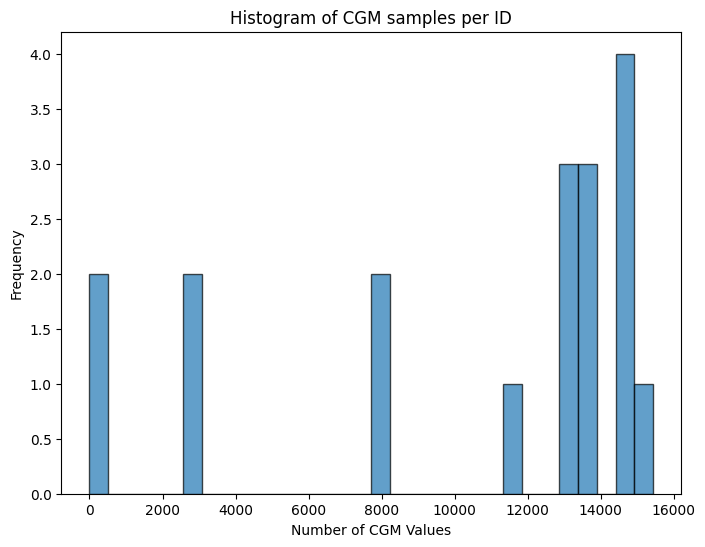

In [21]:
plot_feature_samples_per_subject(combined_df, 'CGM')

/var/folders/q1/5jqy1fgs07j9ptpmdsmmhxnw0000gn/T/ipykernel_87919/3921084616.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_daily_sum = df.groupby('id').apply(resample_and_sum)


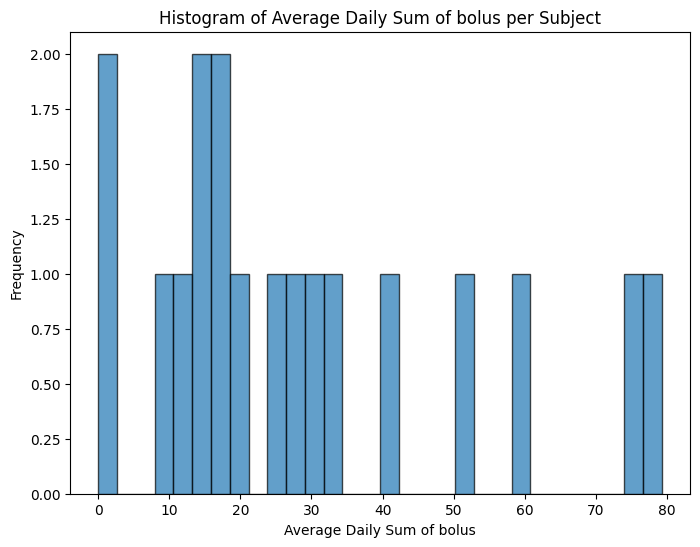

In [25]:
plot_daily_average_feature_sum_per_subject(combined_df, 'bolus')

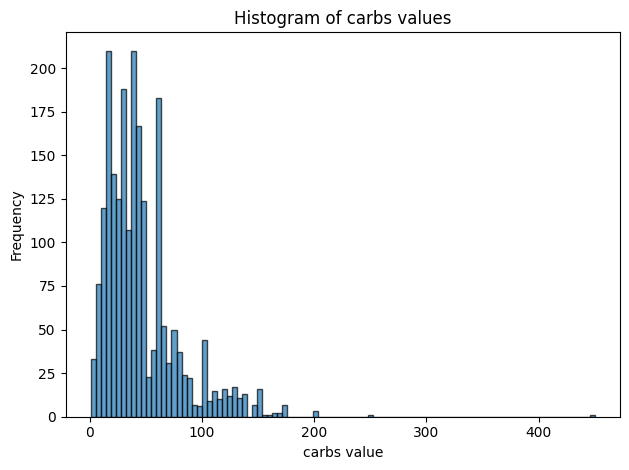

In [26]:
plot_histogram_for_feature(combined_df, 'carbs')

In [29]:
# TODO: Separate this into test and train
print_samples_per_feature(combined_df)

CGM: 187981
carbs: 478
bolus: 211377
basal: 249896
gsr: 147444
skin_temp: 147590
exercise: 155383
active_insulin: 190972
active_carbs: 190972
is_test: 190972
id: 257805
heartrate: 105737
dataset: 257805
meal_grams: 93
meal_name: 93
meal_category: 93
workout: 477
workout_intensity: 776
workout_duration: 19648
